# 2ª parte - PRIMERA PRACTICA CON MACHINE LEARNING - TITANIC

![](https://www.ecestaticos.com/imagestatic/clipping/7f2/b28/7f2b284f122e99c78676fc0a20440615/todos-los-objetos-y-restos-del-titanic-valorados-en-200-millones-a-subasta.jpg?mtime=1579565836)

## Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

# Versiones y librerías


In [2]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 | packaged by conda-forge | (default, Jul  1 2019, 21:52:21) 
[GCC 7.3.0]
scipy: 1.3.1
numpy: 1.17.2
matplotlib: 3.1.1
pandas: 0.25.1
sklearn: 0.22.2


# Import libraries

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc


# Carga del dataset

In [4]:
# Carga del dataset
dataset = pd.read_csv("dataset_EDA.csv")
test = pd.read_csv("test_EDA.csv")

In [5]:
dataset

Survived  Pclass                                               Name  Sex  \
0           0       3                            Braund, Mr. Owen Harris    0   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2           1       3                             Heikkinen, Miss. Laina    1   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4           0       3                           Allen, Mr. William Henry    0   
..        ...     ...                                                ...  ...   
886         0       2                              Montvila, Rev. Juozas    0   
887         1       1                       Graham, Miss. Margaret Edith    1   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"    1   
889         1       1                              Behr, Mr. Karl Howell    0   
890         0       3                                Dooley, Mr. Patrick    0   

     Age  SibSp  Parch      Fare Embarked  FamilySize  IsAlone FareGroup_4  \
0     22      1      0  2.110213        S           2        0         Low   
1     38      1      0  4.280593        C           2        0         TOP   
2     26      0      0  2.188856        S           1        1      Middle   
3     35      1      0  3.990834        S           2        0         TOP   
4     35      0      0  2.202765        S           1        1      Middle   
..   ...    ...    ...       ...      ...         ...      ...         ...   
886   27      0      0  2.639057        S           1        1      Middle   
887   19      0      0  3.433987        S           1        1        High   
888   29      1      2  3.196630        S           4        0        High   
889   26      0      0  3.433987        C           1        1        High   
890   32      0      0  2.169054        Q           1        1         Low   

    AgeGroup Title  InCabin  
0    Student    Mr    False  
1      Adult   Mrs     True  
2    Student  Miss    False  
3    Student   Mrs     True  
4    Student    Mr    False  
..       ...   ...      ...  
886  Student   Rev    False  
887  Student  Miss     True  
888  Student  Miss    False  
889  Student    Mr     True  
890  Student    Mr    False  

[891 rows x 15 columns]

In [6]:
# mostramos los 10 primero resultados
dataset.head(10)

Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   
5         0       3                                   Moran, Mr. James    0   
6         0       1                            McCarthy, Mr. Timothy J    0   
7         0       3                     Palsson, Master. Gosta Leonard    0   
8         1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    1   
9         1       2                Nasser, Mrs. Nicholas (Adele Achem)    1   

   Age  SibSp  Parch      Fare Embarked  FamilySize  IsAlone FareGroup_4  \
0   22      1      0  2.110213        S           2        0         Low   
1   38      1      0  4.280593        C           2        0         TOP   
2   26      0      0  2.188856        S           1        1      Middle   
3   35      1      0  3.990834        S           2        0         TOP   
4   35      0      0  2.202765        S           1        1      Middle   
5   29      0      0  2.246893        Q           1        1      Middle   
6   54      0      0  3.967694        S           1        1         TOP   
7    2      3      1  3.094446        S           5        0        High   
8   27      0      2  2.495954        S           3        0      Middle   
9   14      1      0  3.436268        C           2        0        High   

  AgeGroup   Title  InCabin  
0  Student      Mr    False  
1    Adult     Mrs     True  
2  Student    Miss    False  
3  Student     Mrs     True  
4  Student      Mr    False  
5  Student      Mr    False  
6    Adult      Mr     True  
7     Baby  Master    False  
8  Student     Mrs    False  
9    Child     Mrs    False

## Variable correlation

- What is Correlation?
- Test Dataset
- Covariance
- Pearson’s Correlation
- Spearman’s Correlation

In [7]:
dataset.shape, test.shape

((891, 15), (418, 15))

In [8]:
corr = dataset.corr()
print(corr['Survived'].sort_values(ascending=False)[:5], '\n')
print(corr['Survived'].sort_values(ascending=False)[-5:])

Survived    1.000000
Sex         0.543351
Fare        0.329862
InCabin     0.316912
Parch       0.081629
Name: Survived, dtype: float64 

FamilySize    0.016639
SibSp        -0.035322
Age          -0.067809
IsAlone      -0.203367
Pclass       -0.338481
Name: Survived, dtype: float64


In [9]:
corr

Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived    1.000000 -0.338481  0.543351 -0.067809 -0.035322  0.081629   
Pclass     -0.338481  1.000000 -0.131900 -0.335071  0.083081  0.018443   
Sex         0.543351 -0.131900  1.000000 -0.082533  0.114631  0.245489   
Age        -0.067809 -0.335071 -0.082533  1.000000 -0.232743 -0.176744   
SibSp      -0.035322  0.083081  0.114631 -0.232743  1.000000  0.414838   
Parch       0.081629  0.018443  0.245489 -0.176744  0.414838  1.000000   
Fare        0.329862 -0.661022  0.263276  0.106157  0.318528  0.332186   
FamilySize  0.016639  0.065997  0.200988 -0.247370  0.890712  0.783111   
IsAlone    -0.203367  0.135207 -0.303646  0.176639 -0.584471 -0.583398   
InCabin     0.316912 -0.725541  0.140391  0.236172 -0.040460  0.036987   

                Fare  FamilySize   IsAlone   InCabin  
Survived    0.329862    0.016639 -0.203367  0.316912  
Pclass     -0.661022    0.065997  0.135207 -0.725541  
Sex         0.263276    0.200988 -0.303646  0.140391  
Age         0.106157   -0.247370  0.176639  0.236172  
SibSp       0.318528    0.890712 -0.584471 -0.040460  
Parch       0.332186    0.783111 -0.583398  0.036987  
Fare        1.000000    0.383658 -0.478410  0.557192  
FamilySize  0.383658    1.000000 -0.690922 -0.009175  
IsAlone    -0.478410   -0.690922  1.000000 -0.158029  
InCabin     0.557192   -0.009175 -0.158029  1.000000

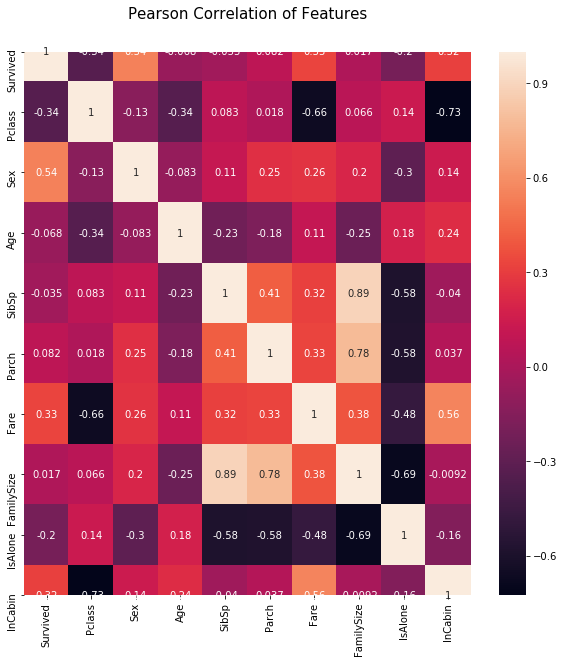

In [10]:
correlation_matrix = dataset.corr()
correlation_matrix

plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix, annot=True)

## Preparación del modelo

In [11]:
dataset.head(10)

Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   
5         0       3                                   Moran, Mr. James    0   
6         0       1                            McCarthy, Mr. Timothy J    0   
7         0       3                     Palsson, Master. Gosta Leonard    0   
8         1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    1   
9         1       2                Nasser, Mrs. Nicholas (Adele Achem)    1   

   Age  SibSp  Parch      Fare Embarked  FamilySize  IsAlone FareGroup_4  \
0   22      1      0  2.110213        S           2        0         Low   
1   38      1      0  4.280593        C           2        0         TOP   
2   26      0      0  2.188856        S           1        1      Middle   
3   35      1      0  3.990834        S           2        0         TOP   
4   35      0      0  2.202765        S           1        1      Middle   
5   29      0      0  2.246893        Q           1        1      Middle   
6   54      0      0  3.967694        S           1        1         TOP   
7    2      3      1  3.094446        S           5        0        High   
8   27      0      2  2.495954        S           3        0      Middle   
9   14      1      0  3.436268        C           2        0        High   

  AgeGroup   Title  InCabin  
0  Student      Mr    False  
1    Adult     Mrs     True  
2  Student    Miss    False  
3  Student     Mrs     True  
4  Student      Mr    False  
5  Student      Mr    False  
6    Adult      Mr     True  
7     Baby  Master    False  
8  Student     Mrs    False  
9    Child     Mrs    False

In [12]:
# Eliminamos las variables 
dataset.drop(['Name'], axis=1, inplace=True)
test.drop(['Name'], axis=1, inplace=True)

In [13]:
dataset.shape, test.shape

((891, 14), (418, 14))

In [14]:
cols = ['Embarked', 'FareGroup_4', 'AgeGroup','Title']
train_categorical = dataset[cols]
train_categorical = pd.concat([pd.get_dummies(train_categorical[col], prefix=col) 
                               for col in train_categorical], axis=1)
train_categorical.head()

Embarked_C  Embarked_Q  Embarked_S  FareGroup_4_High  FareGroup_4_Low  \
0           0           0           1                 0                1   
1           1           0           0                 0                0   
2           0           0           1                 0                0   
3           0           0           1                 0                0   
4           0           0           1                 0                0   

   FareGroup_4_Middle  FareGroup_4_TOP  AgeGroup_Adult  AgeGroup_Baby  \
0                   0                0               0              0   
1                   0                1               1              0   
2                   1                0               0              0   
3                   0                1               0              0   
4                   1                0               0              0   

   AgeGroup_Child  ...  Title_Major  Title_Master  Title_Miss  Title_Mlle  \
0               0  ...            0             0           0           0   
1               0  ...            0             0           0           0   
2               0  ...            0             0           1           0   
3               0  ...            0             0           0           0   
4               0  ...            0             0           0           0   

   Title_Mme  Title_Mr  Title_Mrs  Title_Ms  Title_Rev  Title_Sir  
0          0         1          0         0          0          0  
1          0         0          1         0          0          0  
2          0         0          0         0          0          0  
3          0         0          1         0          0          0  
4          0         1          0         0          0          0  

[5 rows x 29 columns]

In [15]:
train_titanic_bin = pd.concat([dataset[dataset.columns[~dataset.columns.isin(cols)]], train_categorical], axis=1)
train_titanic_bin

Survived  Pclass  Sex  Age  SibSp  Parch      Fare  FamilySize  IsAlone  \
0           0       3    0   22      1      0  2.110213           2        0   
1           1       1    1   38      1      0  4.280593           2        0   
2           1       3    1   26      0      0  2.188856           1        1   
3           1       1    1   35      1      0  3.990834           2        0   
4           0       3    0   35      0      0  2.202765           1        1   
..        ...     ...  ...  ...    ...    ...       ...         ...      ...   
886         0       2    0   27      0      0  2.639057           1        1   
887         1       1    1   19      0      0  3.433987           1        1   
888         0       3    1   29      1      2  3.196630           4        0   
889         1       1    0   26      0      0  3.433987           1        1   
890         0       3    0   32      0      0  2.169054           1        1   

     InCabin  ...  Title_Major  Title_Master  Title_Miss  Title_Mlle  \
0      False  ...            0             0           0           0   
1       True  ...            0             0           0           0   
2      False  ...            0             0           1           0   
3       True  ...            0             0           0           0   
4      False  ...            0             0           0           0   
..       ...  ...          ...           ...         ...         ...   
886    False  ...            0             0           0           0   
887     True  ...            0             0           1           0   
888    False  ...            0             0           1           0   
889     True  ...            0             0           0           0   
890    False  ...            0             0           0           0   

     Title_Mme  Title_Mr  Title_Mrs  Title_Ms  Title_Rev  Title_Sir  
0            0         1          0         0          0          0  
1            0         0          1         0          0          0  
2            0         0          0         0          0          0  
3            0         0          1         0          0          0  
4            0         1          0         0          0          0  
..         ...       ...        ...       ...        ...        ...  
886          0         0          0         0          1          0  
887          0         0          0         0          0          0  
888          0         0          0         0          0          0  
889          0         1          0         0          0          0  
890          0         1          0         0          0          0  

[891 rows x 39 columns]

In [16]:
# Aplicamos al test
test_categorical = test[cols]
test_categorical = pd.concat([pd.get_dummies(test_categorical[col], prefix=col) 
                               for col in test_categorical], axis=1)

In [17]:
test_titanic_bin = pd.concat([test[test.columns[~test.columns.isin(cols)]], test_categorical], axis=1)
test_titanic_bin

PassengerId  Pclass  Sex  Age  SibSp  Parch      Fare  FamilySize  \
0            892       3    0   34      0      0  2.178064           1   
1            893       3    1   47      1      0  2.079442           2   
2            894       2    0   62      0      0  2.369075           1   
3            895       3    0   27      0      0  2.268252           1   
4            896       3    1   22      1      1  2.586824           3   
..           ...     ...  ...  ...    ...    ...       ...         ...   
413         1305       3    0   30      0      0  2.202765           1   
414         1306       1    1   39      0      0  4.699571           1   
415         1307       3    0   38      0      0  2.110213           1   
416         1308       3    0   30      0      0  2.202765           1   
417         1309       3    0   30      1      1  3.150952           3   

     IsAlone  InCabin  ...  AgeGroup_Student  Title_Col  Title_Dona  Title_Dr  \
0          1    False  ...                 1          0           0         0   
1          0    False  ...                 0          0           0         0   
2          1    False  ...                 0          0           0         0   
3          1    False  ...                 1          0           0         0   
4          0    False  ...                 1          0           0         0   
..       ...      ...  ...               ...        ...         ...       ...   
413        1    False  ...                 1          0           0         0   
414        1     True  ...                 0          0           1         0   
415        1    False  ...                 0          0           0         0   
416        1    False  ...                 1          0           0         0   
417        0    False  ...                 1          0           0         0   

     Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Ms  Title_Rev  
0               0           0         1          0         0          0  
1               0           0         0          1         0          0  
2               0           0         1          0         0          0  
3               0           0         1          0         0          0  
4               0           0         0          1         0          0  
..            ...         ...       ...        ...       ...        ...  
413             0           0         1          0         0          0  
414             0           0         0          0         0          0  
415             0           0         1          0         0          0  
416             0           0         1          0         0          0  
417             1           0         0          0         0          0  

[418 rows x 31 columns]

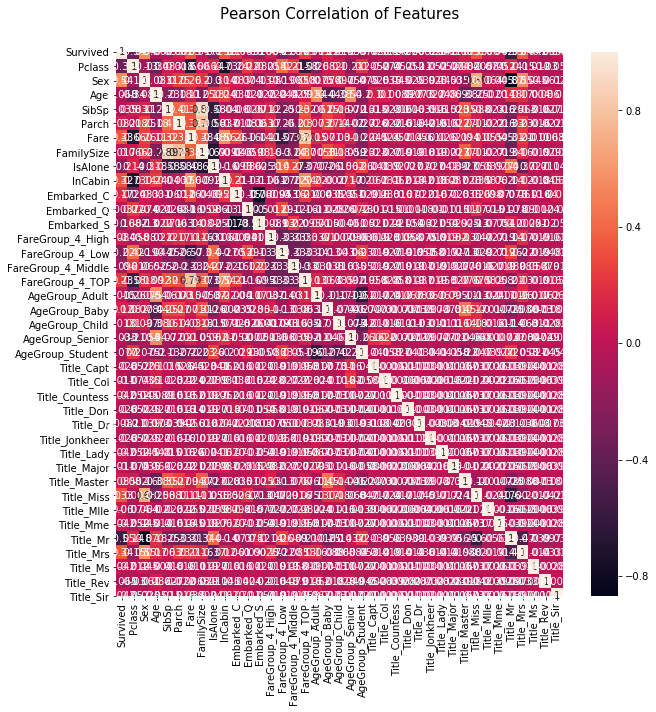

In [18]:
correlation_matrix = train_titanic_bin.corr()
correlation_matrix

plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix, annot=True)

## 1. Creación del modelo - sin estandarizar

In [19]:
# Guardamos copia de seguridad
train_bak = train_titanic_bin
test_bak = test_titanic_bin

In [20]:
train_titanic_bin.shape, test_titanic_bin.shape

((891, 39), (418, 31))

In [21]:
train_titanic_bin.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize', 'IsAlone', 'InCabin', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'FareGroup_4_High', 'FareGroup_4_Low',
       'FareGroup_4_Middle', 'FareGroup_4_TOP', 'AgeGroup_Adult',
       'AgeGroup_Baby', 'AgeGroup_Child', 'AgeGroup_Senior',
       'AgeGroup_Student', 'Title_Capt', 'Title_Col', 'Title_Countess',
       'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady',
       'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle',
       'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev',
       'Title_Sir'], dtype=object)

In [22]:
train_vars = train_titanic_bin.columns.values.tolist()
columnas = ['Pclass','Sex','Age','SibSp',
           'Parch','Fare','InCabin']
y = ['Survived']
X1 = [v for v in train_vars if v not in y]
X2 = [v for v in columnas if v not in y]

In [23]:
y, X1

(['Survived'],
 ['Pclass',
  'Sex',
  'Age',
  'SibSp',
  'Parch',
  'Fare',
  'FamilySize',
  'IsAlone',
  'InCabin',
  'Embarked_C',
  'Embarked_Q',
  'Embarked_S',
  'FareGroup_4_High',
  'FareGroup_4_Low',
  'FareGroup_4_Middle',
  'FareGroup_4_TOP',
  'AgeGroup_Adult',
  'AgeGroup_Baby',
  'AgeGroup_Child',
  'AgeGroup_Senior',
  'AgeGroup_Student',
  'Title_Capt',
  'Title_Col',
  'Title_Countess',
  'Title_Don',
  'Title_Dr',
  'Title_Jonkheer',
  'Title_Lady',
  'Title_Major',
  'Title_Master',
  'Title_Miss',
  'Title_Mlle',
  'Title_Mme',
  'Title_Mr',
  'Title_Mrs',
  'Title_Ms',
  'Title_Rev',
  'Title_Sir'])

In [24]:
y, X2

(['Survived'], ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'InCabin'])

In [25]:
n = 10
from sklearn.feature_selection import RFE
lr = LogisticRegression()
rfe = RFE(lr, n)
rfe = rfe.fit(train_titanic_bin[columnas], train_titanic_bin[y].values.ravel())

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
n = 10
from sklearn.feature_selection import RFE
lr = LogisticRegression()
rfe = RFE(lr, n)
rfe = rfe.fit(train_titanic_bin[X1], train_titanic_bin[y].values.ravel())

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [27]:
print(rfe.support_)

[ True  True False False False False False False  True False False False
 False False False False  True False False  True False False False False
  True False False False False  True False False False  True  True False
  True False]


In [28]:
print(rfe.ranking_)

[ 1  1 28 10 21  5  4  8  1 19 27  6 18 29 23 22  1  3 11  1 12  7 26 24
  1  2 13 17 16  1 15 20 25  1  1 14  1  9]


In [29]:
z1=zip(train_vars, rfe.support_, rfe.ranking_)
list(z1)

[('Survived', True, 1),
 ('Pclass', True, 1),
 ('Sex', False, 28),
 ('Age', False, 10),
 ('SibSp', False, 21),
 ('Parch', False, 5),
 ('Fare', False, 4),
 ('FamilySize', False, 8),
 ('IsAlone', True, 1),
 ('InCabin', False, 19),
 ('Embarked_C', False, 27),
 ('Embarked_Q', False, 6),
 ('Embarked_S', False, 18),
 ('FareGroup_4_High', False, 29),
 ('FareGroup_4_Low', False, 23),
 ('FareGroup_4_Middle', False, 22),
 ('FareGroup_4_TOP', True, 1),
 ('AgeGroup_Adult', False, 3),
 ('AgeGroup_Baby', False, 11),
 ('AgeGroup_Child', True, 1),
 ('AgeGroup_Senior', False, 12),
 ('AgeGroup_Student', False, 7),
 ('Title_Capt', False, 26),
 ('Title_Col', False, 24),
 ('Title_Countess', True, 1),
 ('Title_Don', False, 2),
 ('Title_Dr', False, 13),
 ('Title_Jonkheer', False, 17),
 ('Title_Lady', False, 16),
 ('Title_Major', True, 1),
 ('Title_Master', False, 15),
 ('Title_Miss', False, 20),
 ('Title_Mlle', False, 25),
 ('Title_Mme', True, 1),
 ('Title_Mr', True, 1),
 ('Title_Mrs', False, 14),
 ('Title_M

In [30]:
n = 10
from sklearn.feature_selection import RFE
lr = LogisticRegression()
rfe = RFE(lr, n)
rfe = rfe.fit(train_titanic_bin[columnas], train_titanic_bin[y].values.ravel())

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
z2=zip(train_vars, rfe.support_, rfe.ranking_)
list(z2)

[('Survived', True, 1),
 ('Pclass', True, 1),
 ('Sex', True, 1),
 ('Age', True, 1),
 ('SibSp', True, 1),
 ('Parch', True, 1),
 ('Fare', True, 1)]

## Train and Test

In [32]:
X1 = train_titanic_bin[columnas]
y1 = train_titanic_bin['Survived']

In [34]:
X1, y1

(     Pclass  Sex  Age  SibSp  Parch      Fare  InCabin
 0         3    0   22      1      0  2.110213    False
 1         1    1   38      1      0  4.280593     True
 2         3    1   26      0      0  2.188856    False
 3         1    1   35      1      0  3.990834     True
 4         3    0   35      0      0  2.202765    False
 ..      ...  ...  ...    ...    ...       ...      ...
 886       2    0   27      0      0  2.639057    False
 887       1    1   19      0      0  3.433987     True
 888       3    1   29      1      2  3.196630    False
 889       1    0   26      0      0  3.433987     True
 890       3    0   32      0      0  2.169054    False
 
 [891 rows x 7 columns], 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1,
                                                   test_size=0.20, random_state=17)

In [36]:
X_train.shape, X_test.shape

((712, 7), (179, 7))

In [37]:
y_train.shape, y_test.shape

((712,), (179,))

### Logistic Regression 1

In [38]:
lr_model = LogisticRegression().fit(X_train, y_train)
lr_model

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
predict_log = lr_model.predict(X_test)
predict_log

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0])

In [40]:
# Métricas de la regresión logística
log_score = round(lr_model.score(X_train, y_train) *100, 2)
print(log_score)

81.88


In [41]:
print(classification_report(y_test, predict_log))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       106
           1       0.74      0.70      0.72        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



Text(114.0, 0.5, 'actual')

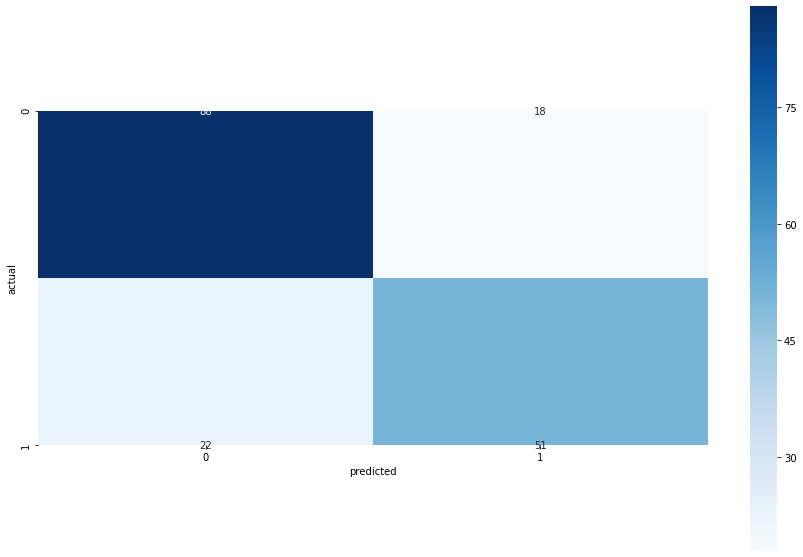

In [44]:
# Create a confusion matrix
plt.figure(figsize=(15,10))
matrix = confusion_matrix(y_test, predict_log)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")

### Logistic Regression 2

In [46]:
X2 = train_titanic_bin[X1]
y2 = train_titanic_bin['Survived']
X_train, X_test, y_train, y_test = train_test_split(X2, y2,
                                                   test_size=0.20, random_state=17)

ValueError: Must pass DataFrame with boolean values only

In [ ]:
lr_model = LogisticRegression().fit(X_train, y_train)
lr_model

In [ ]:
predict_log_2 = lr_model.predict(X_test)
predict_log_2

In [ ]:
# Métricas de la regresión logística
log_score_2 = round(lr_model.score(X_train, y_train) *100, 2)
print(log_score_2)

In [69]:
print(classification_report(y_test, predict_log_2))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       106
           1       0.75      0.75      0.75        73

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## Métricas para evaluar un modelo de clasificación

A lo largo del tiempo se han definido muchas métricas para evaluar la calidad de estos modelos de clasificación, y usar una o otra dependerá mucho de la aplicación concreta que queramos hacer. Un modelo será bueno si asigna correctamente las etiquetas de una clase a objetos que no se han usado para crear este modelo. 


### Matriz de confusión
La matriz de confusión es una forma sencilla de presentar los resultados de un modelo de clasificación con dos o más clases. La tabla muestra las predicciones en el eje horitzontal y las etiquetas o resultados reales en el vertical. El nombre que aparece en cada uno de los cuadrantes de la matriz corresponde a las predicciones acertadas, cuando la predicción y la realidad ha coincidido; a los falsos positivos y los falsos negativos.

La relación entre falsos negativos y falsos positivos es un equilibrio en el que minimitzar uno implica maximizar el otro. De manera que dependerá de la aplicación que es lo que queremos priorizar. En una aplicación de control de seguridad, minimizaremos los falsos positivos, ya que no queremos que se nos cuele nadie no autorizado. En otros casos, pero, quizás querremos establecer un equilibrio.

![](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

### Exactitud o _accuracy_

La exactitud o _accuracy_ es la proporción de ejemplos que se han clasificado correctamente, o lo que es lo mismo, en que la categoría que ha predecido nuestro modelo coincide con la categoría correcta.

La ventaja de esta medida es que es muy sencilla de entender, però tiene muchas limitacions, ya que da una visión demasiado simple de lo que realmente está haciendo el modelo. A continuación veremos otras métricas más complejas y qué motivación tenemos para usarlas para mejorar nuestra visión de lo que está haciendo el model en un conjunto de datos determinado.

In [45]:
# Create a confusion matrix
plt.figure(figsize=(20,10))
matrix = confusion_matrix(y_test, predict_log_2)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")

NameError: name 'predict_log_2' is not defined

<Figure size 1440x720 with 0 Axes>

In [71]:
models = pd.DataFrame({
    'Model' :['Logistic Regression_1',
             'Logistic Regression_2'],
    'Score':[log_score,
            log_score_2]
})

In [72]:
models.sort_values(by='Score', ascending=False)

Model  Score
1  Logistic Regression_2  84.55
0  Logistic Regression_1  81.88

In [73]:
# Create a performance_auc dict
performance_auc = {}

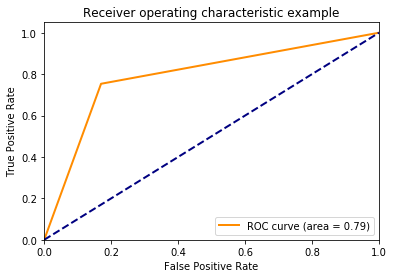

In [74]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predict_log_2)
roc_auc = auc(fpr, tpr)
performance_auc['Logistic Regression_2'] = roc_auc

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()